<a href="https://colab.research.google.com/github/KrishnaTSasi/CODEALPHA_2/blob/main/Code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNEMPLOYMENT ANALYSIS USING PYTHON

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.shape

(768, 7)

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
# Drop the missing values
df.dropna(inplace=True)

In [ ]:
# Convert date to datetime
df[' Date']=pd.to_datetime(df[' Date'],errors='coerce')

/tmp/ipython-input-4027947048.py:2: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Unemployment Rate Over Time by Area

In [ ]:
# Unemployment Rate Over Time by Area using plotly
import plotly.express as px
fig = px.line(
    df,
    x=' Date',
    y=' Estimated Unemployment Rate (%)',
    color='Area',
    markers=True,
    title=" Unemployment Rate Over Time by Area",
    labels={
        ' Date': ' Date',
        ' Estimated Unemployment Rate (%)': ' Estimated Unemployment Rate (%)',
        'Area': 'Area'
    },
    hover_data={
        ' Date': True,
        ' Estimated Unemployment Rate (%)': ':.2f',
        'Area': True
    }
)
fig.update_layout(
    xaxis_title=' Date',
    yaxis_title=' Estimated Unemployment Rate (%)',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.show()

 Average Unemployment Rate by Region

In [ ]:
# Average Unemployment Rate by Region using Plotly
import plotly.express as px

# Group and prepare data
region_avg = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()
region_avg = region_avg.sort_values(by=' Estimated Unemployment Rate (%)', ascending=True)

# Plotly bar chart
fig = px.bar(
    region_avg,
    x=' Estimated Unemployment Rate (%)',
    y='Region',
    orientation='h',
    title=' Average Unemployment Rate by Region',
    labels={' Estimated Unemployment Rate (%)': ' Estimated Unemployment Rate (%)', 'Region': 'Region'},
    hover_data={' Estimated Unemployment Rate (%)': ':.2f'},
    color=' Estimated Unemployment Rate (%)',
    color_continuous_scale='Blues'
)

fig.update_layout(
    xaxis_title=' Estimated Unemployment Rate (%)',
    yaxis_title='Region',
    template='plotly_white',
    title_x=0.5,
    coloraxis_showscale=False
)

fig.show()

In [ ]:
# Add 'month' column for seasonal trend
df['month'] = df[' Date'].dt.month

Plotly Version with Hover

In [ ]:
# Seasonal Unemployment Trend (Monthly Average) using Plotly
import plotly.express as px
df['month'] = df[' Date'].dt.month

# Calculate monthly average unemployment rate
monthly_avg = df.groupby('month')[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Create interactive Plotly line plot
fig = px.line(
    monthly_avg,
    x='month',
    y=' Estimated Unemployment Rate (%)',
    markers=True,
    title=" Seasonal Unemployment Trend (Monthly Average)",
    labels={'month': 'Month', ' Estimated Unemployment Rate (%)': 'Avg Unemployment Rate (%)'},
    hover_data={'month': True, ' Estimated Unemployment Rate (%)': ':.2f'}
)
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    yaxis_title='Avg Unemployment Rate (%)',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.show()

Covid-19 Impact on Unemployment (2020)

In [ ]:
# Covid-19 Impact on Unemployment  using plotly
import plotly.express as px
# Filter data for the year 2020
df_2020 = df[df[' Date'].dt.year == 2020]

# Create line plot
fig = px.line(
    df_2020,
    x=' Date',
    y=' Estimated Unemployment Rate (%)',
    color='Region',
    hover_data=['Region',' Date' , ' Estimated Unemployment Rate (%)'],
    title="Covid-19 Impact on Unemployment (2020)",
    markers=True
)
fig.update_layout(
    xaxis_title=' Date',
    yaxis_title=' Estimated Unemployment Rate (%)',
    legend_title='Region',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.show()

CORRELATION HEATMAP

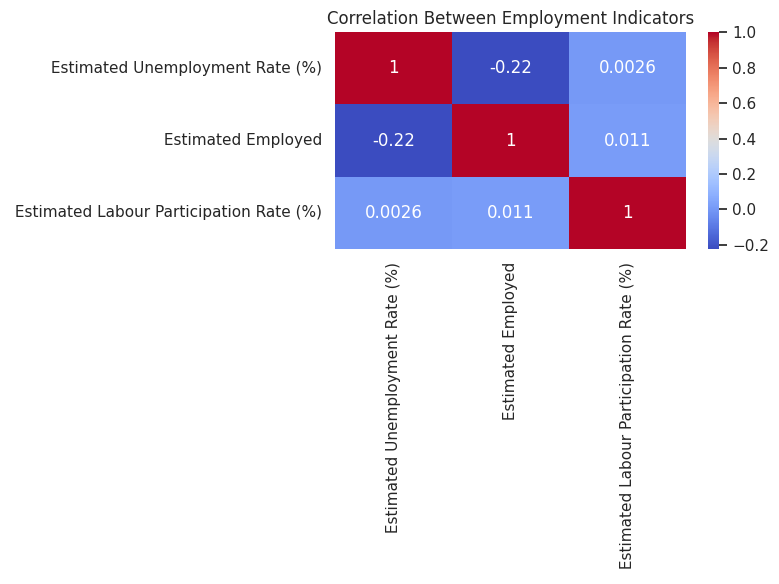

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[[ ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Employment Indicators")
plt.tight_layout()
plt.show()

Sunburst Chart — Area → Region → Unemployment Rate using Plotly

In [ ]:
import plotly.express as px
# Group the data hierarchically by area and region
sunburst_data = df.groupby(['Area', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

# Create the sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['Area', 'Region'],
    values=' Estimated Unemployment Rate (%)',
    color=' Estimated Unemployment Rate (%)',
    color_continuous_scale='RdBu_r',
    title=" Sunburst Chart: Unemployment Rate by Area and Region",
    hover_data={' Estimated Unemployment Rate (%)': ':.2f'}
)
fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)
fig.show()